In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/parkinsons.csv');

In [6]:
data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [7]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
# generate the data description from the loaded data in paragraph


Scatter Plot

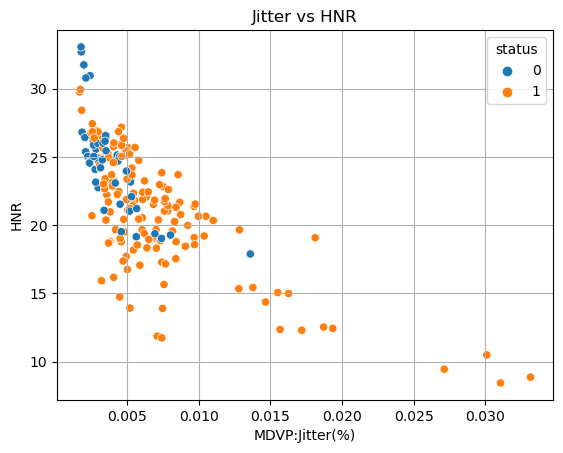

In [4]:
sns.scatterplot(x='MDVP:Jitter(%)', y='HNR',hue='status',data=data)
plt.title('Jitter vs HNR')
plt.grid()
plt.show()


In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [8]:
independent_val_x = data['MDVP:Fo(Hz)'].values
dependent_val_y = data['status'].values


In [19]:
reg = linear_model.LinearRegression()
X = independent_val_x.reshape(-1, 1)  # Reshape X to a 2D array if it's a single feature
reg.fit(X, dependent_val_y)


LinearRegression()

In [20]:
y_pred = reg.predict(X)


In [21]:
mse = mean_squared_error(dependent_val_y, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.15826608701484415


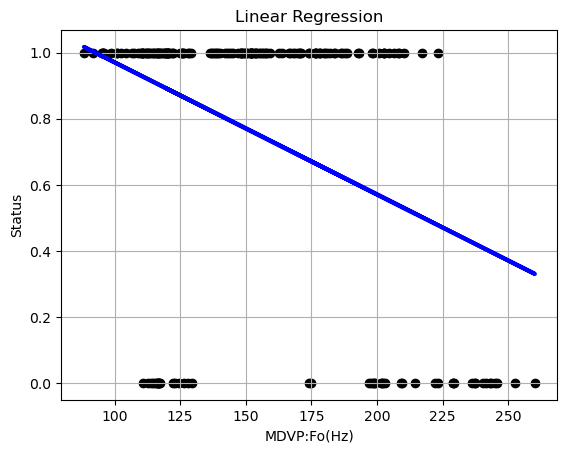

In [27]:
plt.scatter(X, dependent_val_y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('Status')
plt.title('Linear Regression')
plt.grid()
plt.show()


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
x=data.drop(['name', 'status'], axis=1)
y=data['status']

In [31]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=200, stratify=y)

In [43]:
logistic_reg = LogisticRegression()
# logistic_reg.fit(X_train, y_train)

# Predict on the validation set
# y_val_pred = logistic_reg.predict(X_val)

# # Calculate validation accuracy
# validation_accuracy = accuracy_score(y_val, y_val_pred)
# print("Validation Accuracy:", validation_accuracy)

# # Now, predict on the test set
# y_test_pred = logistic_reg.predict(y)

# # Calculate test accuracy
# test_accuracy = accuracy_score(y, y_test_pred.reshape(1, -1))
# print("Test Accuracy:", test_accuracy)

In [46]:
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
classif_report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classif_report)

Accuracy: 0.7948717948717948
Confusion Matrix:
 [[ 4  6]
 [ 2 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.82      0.93      0.87        29

    accuracy                           0.79        39
   macro avg       0.74      0.67      0.69        39
weighted avg       0.78      0.79      0.78        39



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
regression_tree = DecisionTreeRegressor(max_depth=2)
regression_tree.fit(X, y)

DecisionTreeRegressor(max_depth=2)

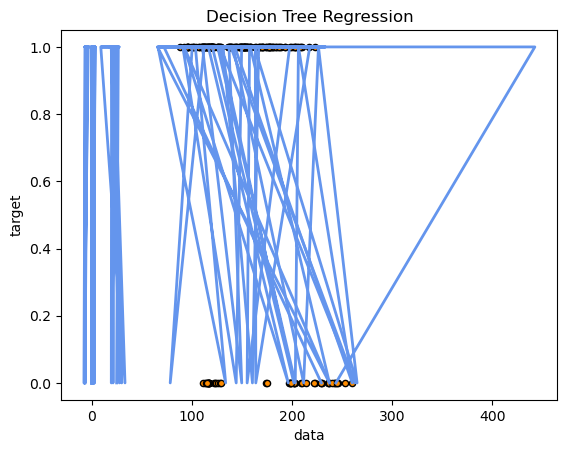

In [50]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_val, y_pred, color="cornflowerblue", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.show()

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X, y)

KNeighborsRegressor()

In [59]:
y_pred = knn_regressor.predict(X_val)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 22 features, but KNeighborsRegressor is expecting 1 features as input.